# Emotion Prediction On Tweeter Data Using NLP

## Imported necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import contractions
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict, Counter
#import numpy as np 
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore','DepricationWarning')

import regex
import re
import string

from PIL import Image

import spacy
import time


import gensim
from spacy.tokenizer import Tokenizer
#from gensim.par

In [3]:
!pip install contractions

## EDA

In [4]:
data=pd.read_csv("twitter_data.csv")
data

,tweet_id,user_id,tweet_location,date and time of tweet,user_timezone,raw_tweets,emotion
0,1467810672,scotthamilton,San Francisco CA,Mon Apr 06 22:19:49 PDT 2021,Eastern Time (US & Canada),fuckin m transtelecom,anger
1,1467810917,mattycus,Los Angeles,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),working but it s fridaaaayyyyy,anger
2,1467811184,ElleCTF,San Diego,Mon Apr 06 22:19:49 PDT 2021,Central Time (US & Canada),packing i don t like it,anger
3,1467811193,Karoli,Los Angeles,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),i tried to dye my hair and all i got was a blo...,anger
4,1467811372,joy_wolf,1/1 loner squad,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),quot locked up abroad quot makes bein half br...,anger
...,...,...,...,...,...,...,...
113323,1825786991,1sweetwhirl,PostVegasDepression in Texsus,Sun May 17 06:50:19 PDT 2021,Eastern Time (US & Canada),that isnt a bill about lgbt sex workers its a...,offensive
113324,1825787130,Fanny_Ingabout,Texas,Sun May 17 06:50:21 PDT 2021,Quito,lol did you just do the trump very fine peopl...,offensive
113325,1825787235,is_na,Tennessee,Sun May 17 06:50:22 PDT 2021,Quito,all i have to say is i amp facial expressions...,offensive
113326,1825787426,JustMe010,NaN,Sun May 17 06:50:24 PDT 2021,Quito,wondering what shit on our east coast causing...,offensive


In [5]:
#checking the shape of the datastest 
#number of rows and columns present in the dataset
data.shape

(113328, 7)

In [6]:
#checking the five row of datasets
data.head()

,tweet_id,user_id,tweet_location,date and time of tweet,user_timezone,raw_tweets,emotion
0,1467810672,scotthamilton,San Francisco CA,Mon Apr 06 22:19:49 PDT 2021,Eastern Time (US & Canada),fuckin m transtelecom,anger
1,1467810917,mattycus,Los Angeles,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),working but it s fridaaaayyyyy,anger
2,1467811184,ElleCTF,San Diego,Mon Apr 06 22:19:49 PDT 2021,Central Time (US & Canada),packing i don t like it,anger
3,1467811193,Karoli,Los Angeles,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),i tried to dye my hair and all i got was a blo...,anger
4,1467811372,joy_wolf,1/1 loner squad,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),quot locked up abroad quot makes bein half br...,anger


In [7]:
data.describe()

,tweet_id
count,1.133280e+05
mean,1.663675e+09
std,1.047540e+08
min,1.467811e+09
25%,1.559609e+09
50%,1.685465e+09
75%,1.753737e+09
max,1.825787e+09


In [8]:
#checking the null value present in the dataset
#checking the types of value present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113328 entries, 0 to 113327
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   tweet_id                113328 non-null  int64 
 1   user_id                 113328 non-null  object
 2   tweet_location          77148 non-null   object
 3   date and time of tweet  113328 non-null  object
 4   user_timezone           76516 non-null   object
 5   raw_tweets              113328 non-null  object
 6   emotion                 113328 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


In [9]:
data.shape

(113328, 7)

In [10]:
#checking the duplicated present the dataset
data.duplicated().sum()


0

In [11]:
data.shape

(113328, 7)

In [12]:
#checking the null value present the the dataset.
data.isnull().sum()

tweet_id                      0
user_id                       0
tweet_location            36180
date and time of tweet        0
user_timezone             36812
raw_tweets                    0
emotion                       0
dtype: int64

In [13]:
data.drop('tweet_location', axis=1, inplace=True)
data.head()


,tweet_id,user_id,date and time of tweet,user_timezone,raw_tweets,emotion
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,Eastern Time (US & Canada),fuckin m transtelecom,anger
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),working but it s fridaaaayyyyy,anger
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,Central Time (US & Canada),packing i don t like it,anger
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),i tried to dye my hair and all i got was a blo...,anger
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,Pacific Time (US & Canada),quot locked up abroad quot makes bein half br...,anger


In [14]:
data.drop('user_timezone', axis=1, inplace=True)
data.head()

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,fuckin m transtelecom,anger
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,working but it s fridaaaayyyyy,anger
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,packing i don t like it,anger
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,i tried to dye my hair and all i got was a blo...,anger
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,quot locked up abroad quot makes bein half br...,anger


In [15]:
data.shape

(113328, 5)

In [16]:
#fill up the null value
#data.dropna(inplace=True)
#data.isnull().sum()

In [17]:
data.shape

(113328, 5)

In [18]:
data.tail()

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion
113323,1825786991,1sweetwhirl,Sun May 17 06:50:19 PDT 2021,that isnt a bill about lgbt sex workers its a...,offensive
113324,1825787130,Fanny_Ingabout,Sun May 17 06:50:21 PDT 2021,lol did you just do the trump very fine peopl...,offensive
113325,1825787235,is_na,Sun May 17 06:50:22 PDT 2021,all i have to say is i amp facial expressions...,offensive
113326,1825787426,JustMe010,Sun May 17 06:50:24 PDT 2021,wondering what shit on our east coast causing...,offensive
113327,1825787489,McCherry,Sun May 17 06:50:24 PDT 2021,here your proof our african friends don t ge...,offensive


In [19]:
data.shape

(113328, 5)

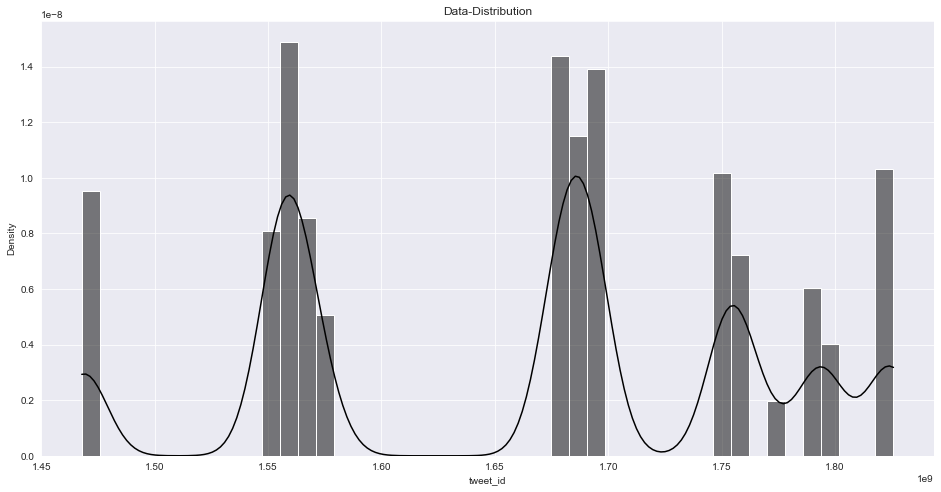

In [20]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,8))
plt.title('Data-Distribution')
sns.histplot(data['tweet_id'], kde=True, color='black', stat='density')
plt.show()

In [21]:
data['user_id'].value_counts()

tweetpet           310
nuttychris          82
TheAmazingCat       62
sebby_peek          53
lost_dog            51
                  ... 
peacockskull         1
lalafashionista      1
littledictator       1
slowdave             1
McCherry             1
Name: user_id, Length: 86896, dtype: int64

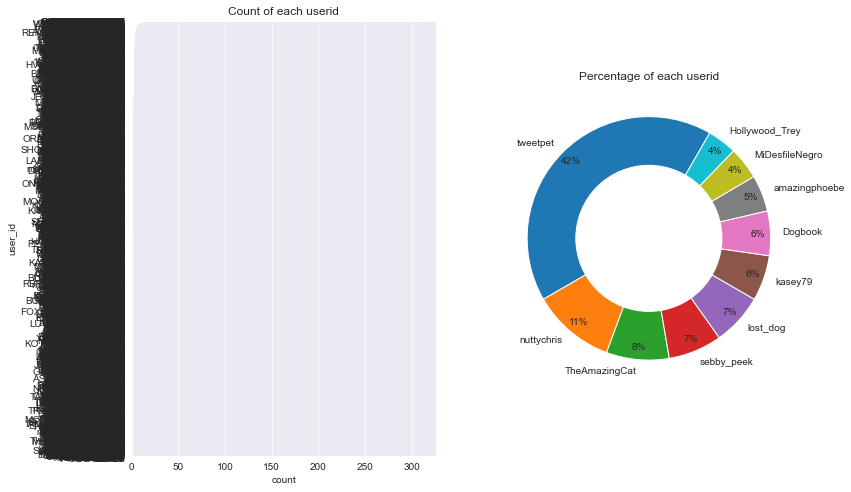

In [22]:
col = 'user_id'
grouped_data = pd.DataFrame(data[col].value_counts())
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])
labels = list(grouped_data.index)
sizes = grouped_data[col]

ax2.pie(sizes[:10],  explode=explode[:10], startangle=60, labels=labels[:10],autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y = col, data = data, ax=ax1, order =labels)
ax1.set_title("Count of each userid")
ax2.set_title("Percentage of each userid")
plt.show()

In [23]:
data.shape

(113328, 5)

In [24]:
#to get the comibined columns in the data 
data[["tweet_id","date and time of tweet"]]

,tweet_id,date and time of tweet
0,1467810672,Mon Apr 06 22:19:49 PDT 2021
1,1467810917,Mon Apr 06 22:19:49 PDT 2021
2,1467811184,Mon Apr 06 22:19:49 PDT 2021
3,1467811193,Mon Apr 06 22:19:49 PDT 2021
4,1467811372,Mon Apr 06 22:19:49 PDT 2021
...,...,...
113323,1825786991,Sun May 17 06:50:19 PDT 2021
113324,1825787130,Sun May 17 06:50:21 PDT 2021
113325,1825787235,Sun May 17 06:50:22 PDT 2021
113326,1825787426,Sun May 17 06:50:24 PDT 2021


In [25]:
data.shape

(113328, 5)

In [26]:
a=data[["tweet_id","date and time of tweet"]].value_counts()
print(a)

tweet_id    date and time of tweet      
1467810672  Mon Apr 06 22:19:49 PDT 2021    1
1695219635  Mon May 04 05:33:25 PDT 2021    1
1695220876  Mon May 04 05:33:38 PDT 2021    1
1695220785  Mon May 04 05:33:37 PDT 2021    1
1695220672  Mon May 04 05:33:36 PDT 2021    1
                                           ..
1573069441  Mon Apr 20 23:35:59 PDT 2021    1
1573068922  Mon Apr 20 23:35:48 PDT 2021    1
1573068641  Mon Apr 20 23:35:44 PDT 2021    1
1573068613  Mon Apr 20 23:35:44 PDT 2021    1
1825787489  Sun May 17 06:50:24 PDT 2021    1
Length: 113328, dtype: int64


In [27]:
# drop last 3 cols
#data.drop(columns=['user_id','tweet_location','user_timezone'	],inplace=True)
#data.head()

In [28]:
data['emotion'].value_counts()

criticism    25066
hate         14886
anger        14839
offensive    10579
joy          10200
optimism      9007
fear          8829
sadness       8520
love          6296
surprise      5106
Name: emotion, dtype: int64

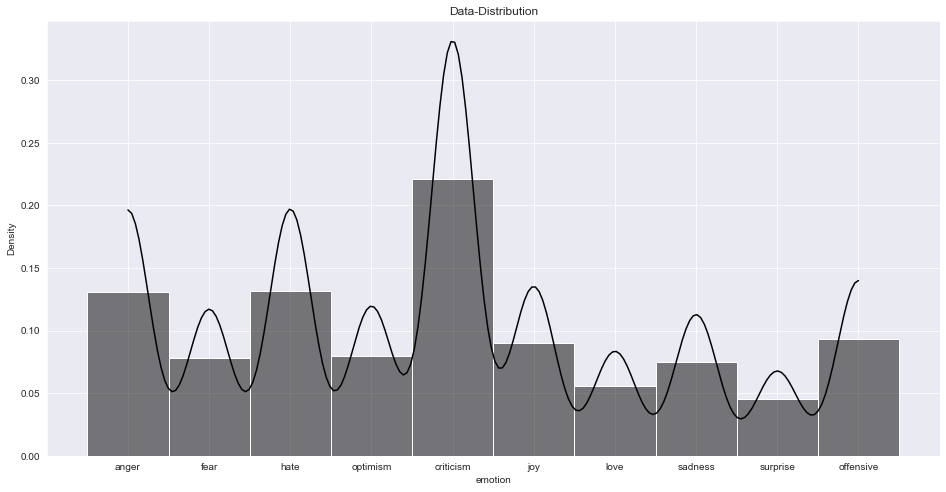

In [29]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,8))
plt.title('Data-Distribution')
sns.histplot(data['emotion'], kde=True, color='black', stat='density')
plt.show()

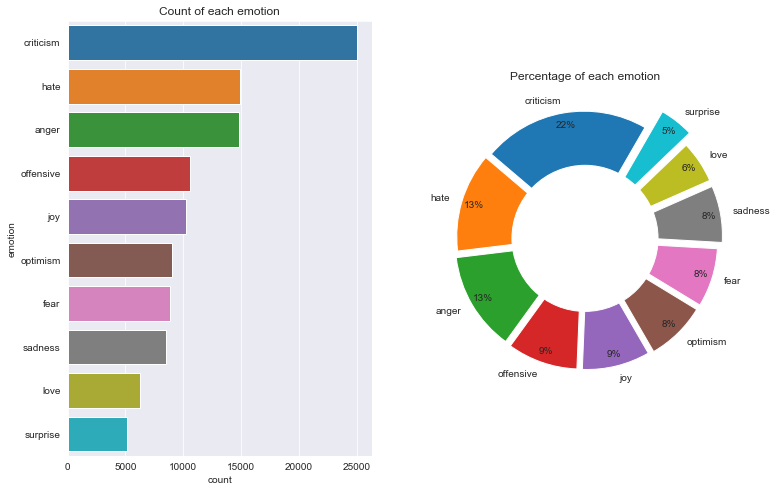

In [30]:
col = 'emotion'
grouped_data = pd.DataFrame(data[col].value_counts())
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])
labels = list(grouped_data.index)
sizes = grouped_data[col]

ax2.pie(sizes[:10],  explode=explode[:10], startangle=60, labels=labels[:10],autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y = col, data = data, ax=ax1, order =labels)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

### There are 10 different emotions.

In [31]:
# Emotion dataframe
grouped_data = pd.DataFrame(data[col].value_counts())
grouped_data

,emotion
criticism,25066
hate,14886
anger,14839
offensive,10579
joy,10200
optimism,9007
fear,8829
sadness,8520
love,6296
surprise,5106


In [32]:
data['char_length'] = data['raw_tweets'].apply(lambda x : len(x))
data['token_length'] = data['raw_tweets'].apply(lambda x : len(x.split(" ")))

## Distribution of character length and token length overall

C:\Users\sonaw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sonaw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


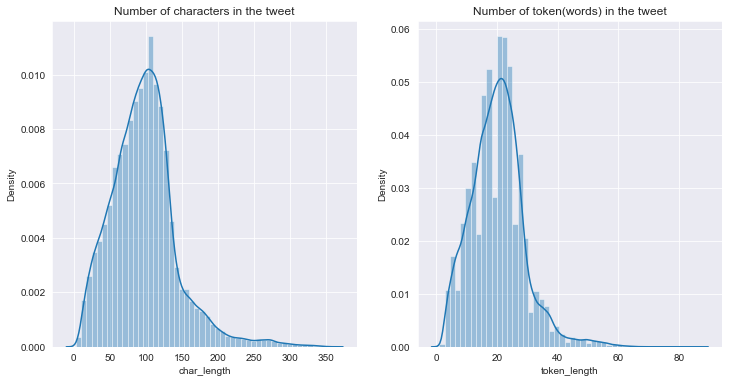

In [33]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(data['char_length'], ax=ax1)
sns.distplot(data['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

## Distribution of character length sentiment-wise [10 Emotions]

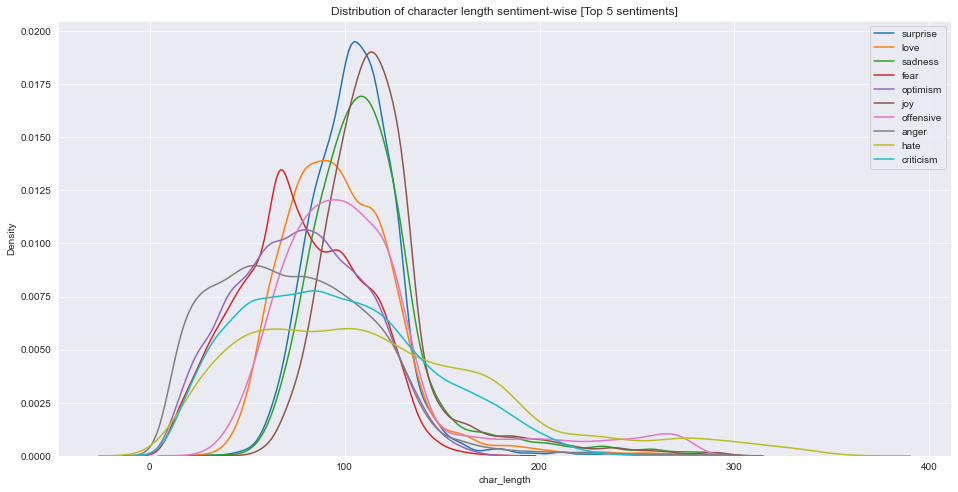

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in data['emotion'].value_counts().sort_values()[:].index.tolist():
    #print(sentiment)
    sns.kdeplot(data[data['emotion']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

## Distribution of token length sentiment-wise [Top 5 Emotions]

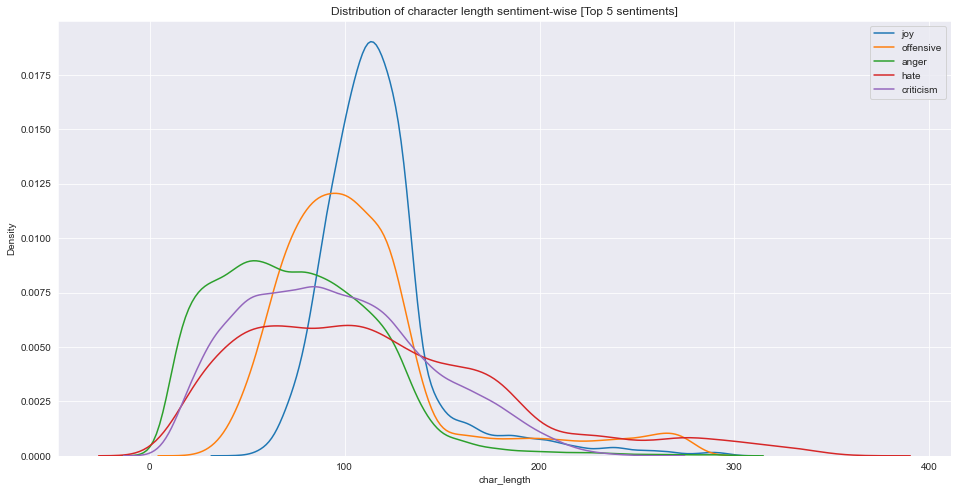

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in data['emotion'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(data[data['emotion']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

## Distribution of token length sentiment-wise [Top 5 Emotions]


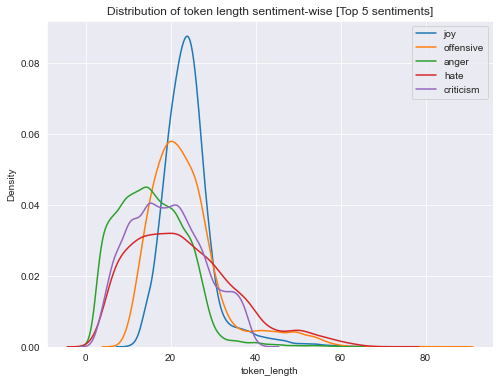

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in data['emotion'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(data[data['emotion']==sentiment]['token_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of token length sentiment-wise [Top 5 sentiments]")
plt.show()

 **The most frequent token length is around 10.**

## Most common character and token length

C:\Users\sonaw\AppData\Local\Temp\ipykernel_20268\2114419227.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_df.index, rotation = 45)
C:\Users\sonaw\AppData\Local\Temp\ipykernel_20268\2114419227.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(avg_df.index, rotation = 45)


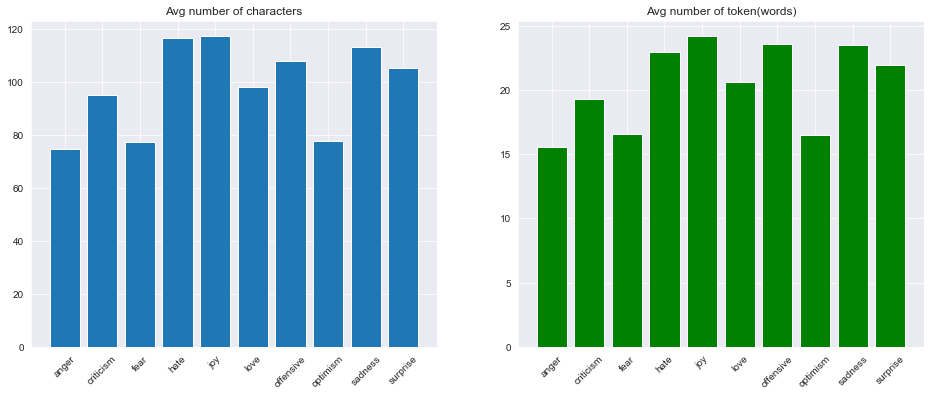

In [37]:
avg_df = data.groupby('emotion').agg({'char_length':'mean', 'token_length':'mean'})

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

In [38]:
data['len']=data['raw_tweets'].apply(lambda x : len([ t for t in x.split()]))

**Relation between sentiment and Tweet length**

C:\Users\sonaw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='len', ylabel='emotion'>

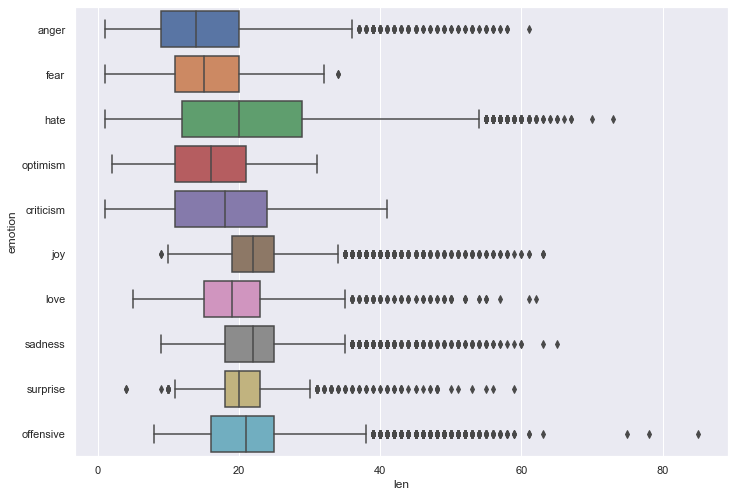

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data['len'],y=data['emotion'])

C:\Users\sonaw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of length')

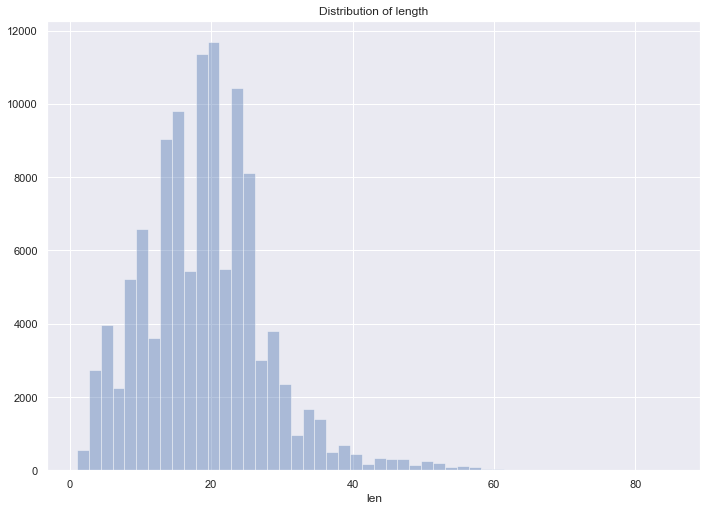

In [40]:
sns.distplot(data['len'],kde=False).set_title('Distribution of length')

## Text Processing

In [41]:
!pip install contractions

In [42]:
# remove urls
data['cleaned_text'] = data['raw_tweets'].replace(r'http\S+', ' ', regex=True)

# convert to lowercase
data['cleaned_text']=data['raw_tweets'].str.lower()

# contractions
data['cleaned_text']=data['raw_tweets'].apply(contractions.fix)

## removing account names -- basically after @ words -- those are usernames
data['cleaned_text']=data['raw_tweets'].apply(lambda x :[t for t in x.split() if not t.startswith('@')] ).apply(lambda x: ' '.join(x))

## removing special characters and number
data['cleaned_text'] = data['raw_tweets'].replace(r'[^A-Za-z]+', ' ', regex=True)

## removing extra spaces 
data['cleaned_text']=data['raw_tweets'].apply(lambda x : x.strip())


In [43]:
data.head()

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion,char_length,token_length,len,cleaned_text
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,fuckin m transtelecom,anger,21,3,3,fuckin m transtelecom
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,working but it s fridaaaayyyyy,anger,30,5,5,working but it s fridaaaayyyyy
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,packing i don t like it,anger,24,7,6,packing i don t like it
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,i tried to dye my hair and all i got was a blo...,anger,96,24,23,i tried to dye my hair and all i got was a blo...
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,quot locked up abroad quot makes bein half br...,anger,141,28,27,quot locked up abroad quot makes bein half bro...


In [44]:
data.shape

(113328, 9)

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## WordClouds

In [46]:
#WordClouds
def generate_wordcloud(data,Emotion,colormap='Set2'):

    fig = plt.figure(figsize=[20, 10])
    stopwords = set(STOPWORDS)
    stopwords.update(['quot'])
    temp_df = data[data['emotion']==sentiment]

    corpus = ''
    for text in temp_df.lemmas_back_to_text:
        text = str(text)
        corpus += text

    bird = np.array(Image.open('Twitter-Logo.png'))

    wordcloud = WordCloud(mask=bird,colormap=colormap,min_word_length=4,stopwords=stopwords,
                           collocation_threshold=20,background_color='black').generate(corpus)
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')

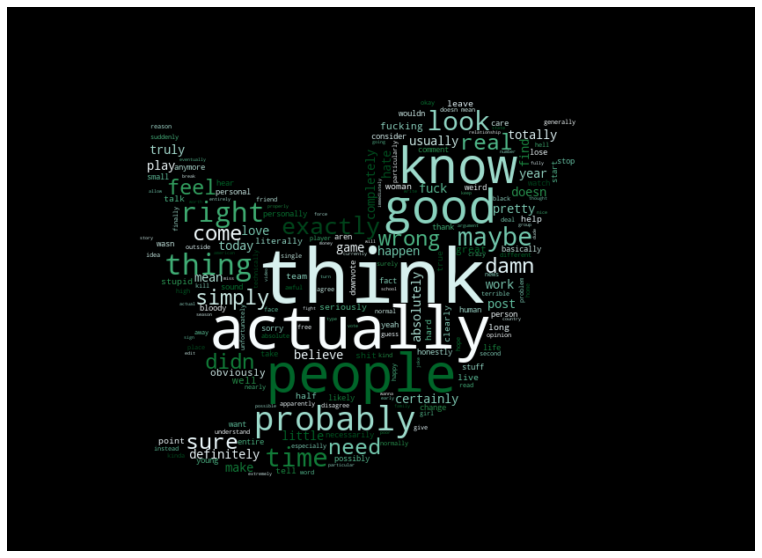

In [75]:
generate_wordcloud(data,'happy','BuGn')

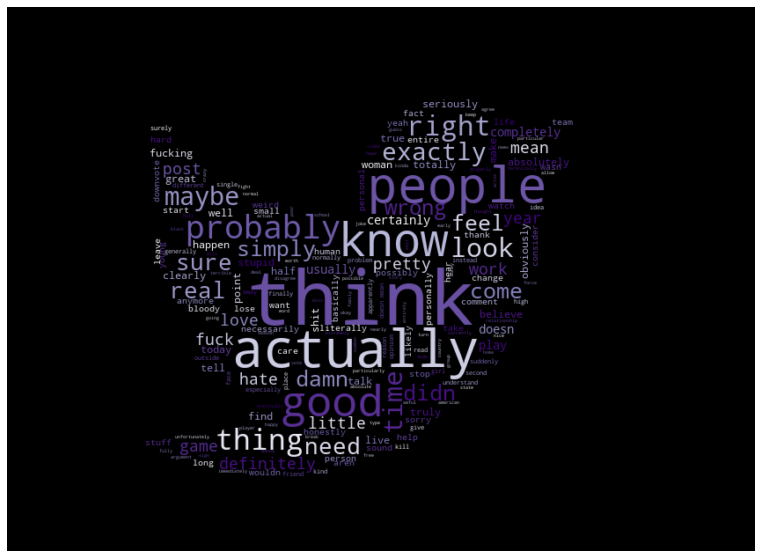

In [76]:
generate_wordcloud(data,'love','Purples')

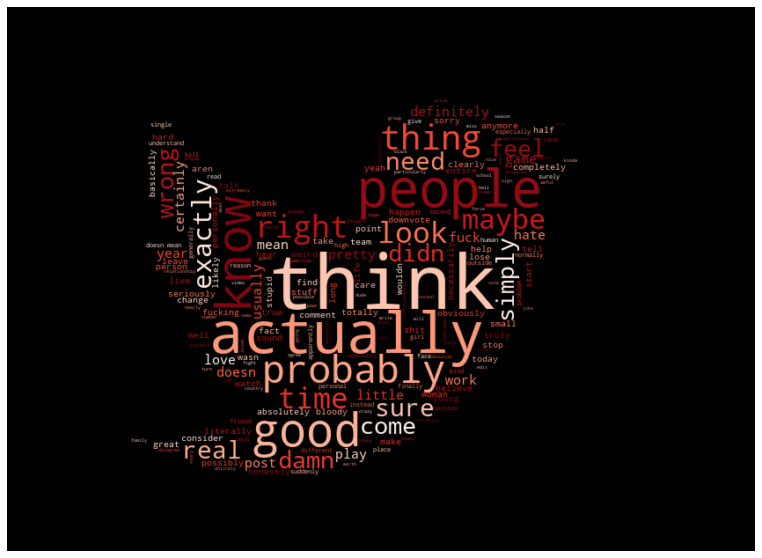

In [77]:
generate_wordcloud(data,'sadness','Reds')

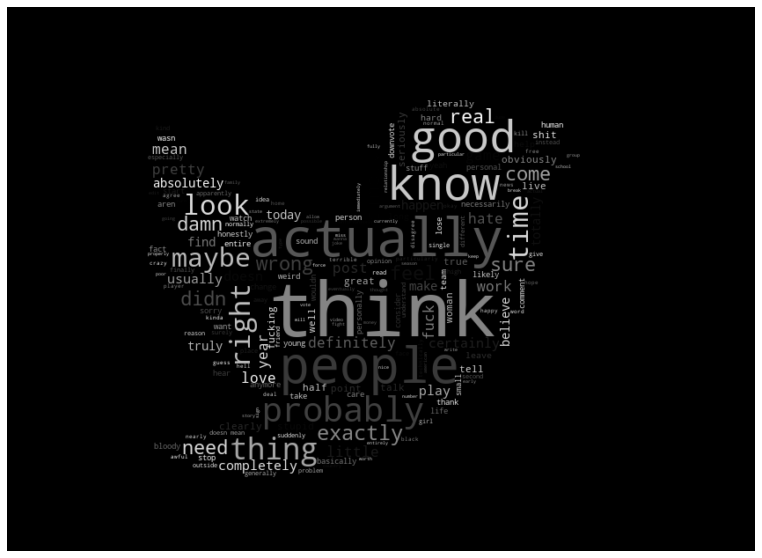

In [78]:
generate_wordcloud(data,'worry','Greys')

**Data Processing**

In [48]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [49]:
import gensim
from spacy.tokenizer import Tokenizer
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

from tqdm import tqdm

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonaw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
tokenizer = Tokenizer(nlp.vocab)
custom_stopwords = ['quot','hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords.words("english"))


tokens = []

for doc in tokenizer.pipe(data['cleaned_text'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

data['tokens'] = tokens

data

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion,char_length,token_length,len,cleaned_text,tokens
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,fuckin m transtelecom,anger,21,3,3,fuckin m transtelecom,"[fuckin, m, transtelecom]"
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,working but it s fridaaaayyyyy,anger,30,5,5,working but it s fridaaaayyyyy,"[working, s, fridaaaayyyyy]"
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,packing i don t like it,anger,24,7,6,packing i don t like it,"[packing, don, t]"
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,i tried to dye my hair and all i got was a blo...,anger,96,24,23,i tried to dye my hair and all i got was a blo...,"[tried, dye, hair, blond, chunk, middle, hair,..."
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,quot locked up abroad quot makes bein half br...,anger,141,28,27,quot locked up abroad quot makes bein half bro...,"[locked, abroad, makes, bein, half, brown, goo..."
...,...,...,...,...,...,...,...,...,...,...
113323,1825786991,1sweetwhirl,Sun May 17 06:50:19 PDT 2021,that isnt a bill about lgbt sex workers its a...,offensive,278,56,54,that isnt a bill about lgbt sex workers its a ...,"[isnt, bill, lgbt, sex, workers, bill, sex, wo..."
113324,1825787130,Fanny_Ingabout,Sun May 17 06:50:21 PDT 2021,lol did you just do the trump very fine peopl...,offensive,270,53,51,lol did you just do the trump very fine people...,"[lol, trump, fine, people, sides, antifa, punc..."
113325,1825787235,is_na,Sun May 17 06:50:22 PDT 2021,all i have to say is i amp facial expressions...,offensive,107,25,22,all i have to say is i amp facial expressions ...,"[amp, facial, expressions, video, fucking]"
113326,1825787426,JustMe010,Sun May 17 06:50:24 PDT 2021,wondering what shit on our east coast causing...,offensive,147,29,27,wondering what shit on our east coast causing ...,"[wondering, shit, east, coast, causing, god, s..."


In [53]:
data['tokens_back_to_text'] = [' '.join(map(str, l)) for l in data['tokens']]

def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

data['lemmas'] = data['tokens_back_to_text'].apply(get_lemmas)

data['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in data['lemmas']]

In [54]:
tokenizer = Tokenizer(nlp.vocab)

def tokenize(text):
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) 
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    tokens = re.sub('\w*\d\w*', '', text)
    tokens = re.sub('@*!*\$*', '', text)
    tokens = tokens.strip(',') 
    tokens = tokens.strip('?') 
    tokens = tokens.strip('!') 
    tokens = tokens.strip("'") 
    tokens = tokens.strip(".") 

    tokens = tokens.lower().split() 
    
    return tokens

data['lemma_tokens'] = data['lemmas_back_to_text'].apply(tokenize)

data

,tweet_id,user_id,date and time of tweet,raw_tweets,emotion,char_length,token_length,len,cleaned_text,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
0,1467810672,scotthamilton,Mon Apr 06 22:19:49 PDT 2021,fuckin m transtelecom,anger,21,3,3,fuckin m transtelecom,"[fuckin, m, transtelecom]",fuckin m transtelecom,"[fuckin, m, transtelecom]",fuckin m transtelecom,"[fuckin, m, transtelecom]"
1,1467810917,mattycus,Mon Apr 06 22:19:49 PDT 2021,working but it s fridaaaayyyyy,anger,30,5,5,working but it s fridaaaayyyyy,"[working, s, fridaaaayyyyy]",working s fridaaaayyyyy,"[work, s, fridaaaayyyyy]",work s fridaaaayyyyy,"[work, s, fridaaaayyyyy]"
2,1467811184,ElleCTF,Mon Apr 06 22:19:49 PDT 2021,packing i don t like it,anger,24,7,6,packing i don t like it,"[packing, don, t]",packing don t,"[pack, don, t]",pack don t,"[pack, don, t]"
3,1467811193,Karoli,Mon Apr 06 22:19:49 PDT 2021,i tried to dye my hair and all i got was a blo...,anger,96,24,23,i tried to dye my hair and all i got was a blo...,"[tried, dye, hair, blond, chunk, middle, hair,...",tried dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d...",try dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d..."
4,1467811372,joy_wolf,Mon Apr 06 22:19:49 PDT 2021,quot locked up abroad quot makes bein half br...,anger,141,28,27,quot locked up abroad quot makes bein half bro...,"[locked, abroad, makes, bein, half, brown, goo...",locked abroad makes bein half brown good risk ...,"[lock, abroad, make, bein, half, brown, good, ...",lock abroad make bein half brown good risk mgm...,"[lock, abroad, make, bein, half, brown, good, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113323,1825786991,1sweetwhirl,Sun May 17 06:50:19 PDT 2021,that isnt a bill about lgbt sex workers its a...,offensive,278,56,54,that isnt a bill about lgbt sex workers its a ...,"[isnt, bill, lgbt, sex, workers, bill, sex, wo...",isnt bill lgbt sex workers bill sex workers ge...,"[not, bill, lgbt, sex, worker, bill, sex, work...",not bill lgbt sex worker bill sex worker gener...,"[not, bill, lgbt, sex, worker, bill, sex, work..."
113324,1825787130,Fanny_Ingabout,Sun May 17 06:50:21 PDT 2021,lol did you just do the trump very fine peopl...,offensive,270,53,51,lol did you just do the trump very fine people...,"[lol, trump, fine, people, sides, antifa, punc...",lol trump fine people sides antifa punches naz...,"[lol, trump, fine, people, side, antifa, punch...",lol trump fine people side antifa punch nazi n...,"[lol, trump, fine, people, side, antifa, punch..."
113325,1825787235,is_na,Sun May 17 06:50:22 PDT 2021,all i have to say is i amp facial expressions...,offensive,107,25,22,all i have to say is i amp facial expressions ...,"[amp, facial, expressions, video, fucking]",amp facial expressions video fucking,"[amp, facial, expression, video, fucking]",amp facial expression video fucking,"[amp, facial, expression, video, fucking]"
113326,1825787426,JustMe010,Sun May 17 06:50:24 PDT 2021,wondering what shit on our east coast causing...,offensive,147,29,27,wondering what shit on our east coast causing ...,"[wondering, shit, east, coast, causing, god, s...",wondering shit east coast causing god send flo...,"[wonder, shit, east, coast, cause, god, send, ...",wonder shit east coast cause god send florence...,"[wonder, shit, east, coast, cause, god, send, ..."


In [55]:
df1 = data.copy()
df1 = data[["cleaned_text","lemmas_back_to_text","lemma_tokens", "emotion"]]
df1

,cleaned_text,lemmas_back_to_text,lemma_tokens,emotion
0,fuckin m transtelecom,fuckin m transtelecom,"[fuckin, m, transtelecom]",anger
1,working but it s fridaaaayyyyy,work s fridaaaayyyyy,"[work, s, fridaaaayyyyy]",anger
2,packing i don t like it,pack don t,"[pack, don, t]",anger
3,i tried to dye my hair and all i got was a blo...,try dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d...",anger
4,quot locked up abroad quot makes bein half bro...,lock abroad make bein half brown good risk mgm...,"[lock, abroad, make, bein, half, brown, good, ...",anger
...,...,...,...,...
113323,that isnt a bill about lgbt sex workers its a ...,not bill lgbt sex worker bill sex worker gener...,"[not, bill, lgbt, sex, worker, bill, sex, work...",offensive
113324,lol did you just do the trump very fine people...,lol trump fine people side antifa punch nazi n...,"[lol, trump, fine, people, side, antifa, punch...",offensive
113325,all i have to say is i amp facial expressions ...,amp facial expression video fucking,"[amp, facial, expression, video, fucking]",offensive
113326,wondering what shit on our east coast causing ...,wonder shit east coast cause god send florence...,"[wonder, shit, east, coast, cause, god, send, ...",offensive


In [56]:
df1 = df1[df1['lemma_tokens'].map(lambda d: len(d)) > 0]
df1

,cleaned_text,lemmas_back_to_text,lemma_tokens,emotion
0,fuckin m transtelecom,fuckin m transtelecom,"[fuckin, m, transtelecom]",anger
1,working but it s fridaaaayyyyy,work s fridaaaayyyyy,"[work, s, fridaaaayyyyy]",anger
2,packing i don t like it,pack don t,"[pack, don, t]",anger
3,i tried to dye my hair and all i got was a blo...,try dye hair blond chunk middle hair dang,"[try, dye, hair, blond, chunk, middle, hair, d...",anger
4,quot locked up abroad quot makes bein half bro...,lock abroad make bein half brown good risk mgm...,"[lock, abroad, make, bein, half, brown, good, ...",anger
...,...,...,...,...
113323,that isnt a bill about lgbt sex workers its a ...,not bill lgbt sex worker bill sex worker gener...,"[not, bill, lgbt, sex, worker, bill, sex, work...",offensive
113324,lol did you just do the trump very fine people...,lol trump fine people side antifa punch nazi n...,"[lol, trump, fine, people, side, antifa, punch...",offensive
113325,all i have to say is i amp facial expressions ...,amp facial expression video fucking,"[amp, facial, expression, video, fucking]",offensive
113326,wondering what shit on our east coast causing ...,wonder shit east coast cause god send florence...,"[wonder, shit, east, coast, cause, god, send, ...",offensive


In [63]:
df1.to_csv('tokena.csv')

In [64]:
df1 =pd.read_csv("tokena.csv")

In [65]:
df1.head()

,Unnamed: 0,cleaned_text,lemmas_back_to_text,lemma_tokens,emotion
0,0,fuckin m transtelecom,fuckin m transtelecom,"['fuckin', 'm', 'transtelecom']",anger
1,1,working but it s fridaaaayyyyy,work s fridaaaayyyyy,"['work', 's', 'fridaaaayyyyy']",anger
2,2,packing i don t like it,pack don t,"['pack', 'don', 't']",anger
3,3,i tried to dye my hair and all i got was a blo...,try dye hair blond chunk middle hair dang,"['try', 'dye', 'hair', 'blond', 'chunk', 'midd...",anger
4,4,quot locked up abroad quot makes bein half bro...,lock abroad make bein half brown good risk mgm...,"['lock', 'abroad', 'make', 'bein', 'half', 'br...",anger


In [66]:
df1.drop('lemmas_back_to_text', axis=1, inplace=True)

In [67]:
df1.drop('lemma_tokens', axis=1, inplace=True)

In [68]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [69]:
#df1.drop('Unnamed: 0.1', axis=1, inplace=True)

In [70]:
df1.head()

,cleaned_text,emotion
0,fuckin m transtelecom,anger
1,working but it s fridaaaayyyyy,anger
2,packing i don t like it,anger
3,i tried to dye my hair and all i got was a blo...,anger
4,quot locked up abroad quot makes bein half bro...,anger


In [71]:
df1.to_csv('final_twitter_dataset.csv')

In [72]:
data1=pd.read_csv("final_twitter_dataset.csv")

In [73]:
data1.drop('Unnamed: 0', axis=1, inplace=True)
data1.head()

,cleaned_text,emotion
0,fuckin m transtelecom,anger
1,working but it s fridaaaayyyyy,anger
2,packing i don t like it,anger
3,i tried to dye my hair and all i got was a blo...,anger
4,quot locked up abroad quot makes bein half bro...,anger


In [74]:
data1.shape

(113263, 2)